How can we retain existing customers and extend customer contract terms?

Below is the data for this time.

* mou_Mean Mean number of monthly minutes of use
* totmrc_Mean Mean total monthly recurring charge
* ovrrev_Mean Mean overage revenue
* change_mou Percentage change in monthly minutes of use vs previous three month average month average
* unan_vce_Mean Mean number of unanswered voice calls
* cc_mou_Mean Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
* churn Instance of churn between 31–60 days after observation date
* months Total number of months in service
* crclscod Credit class code
* totcalls Total number of calls over the life of the customer
* totmou Total minutes of use over the life of the customer
totrev Total revenue
* adjrev Billing adjusted total revenue over the life of the customer
* adjqty Billing adjusted total number of calls over the life of the customer
* avgrev Average monthly revenue over the life of the customer
* avgmou Average monthly minutes of use over the life of the customer
* avgqty Average monthly number of calls over the life of the customer
* avg6rev Average monthly revenue over the previous six months
* area Geogrpahic area
* hnd_price Current handset price
* phones Number of handsets issued
* models Number of models issued
* eqpdays Number of days (age) of current equipment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
input_data_dir = ""
output_data_dir = ""

In [4]:
# type
my_dtype = {
    'Customer_ID':float,
    'rev_Mean':float,
    'mou_Mean':float,
    'totmrc_Mean':float,
    'da_Mean':float,
    'ovrmou_Mean':float,
    'vceovr_Mean':float,
    'datovr_Mean':float,
    'roam_Mean':float,
    'change_mou':float,
    'change_rev':float,
    'drop_vce_Mean':float,
    'drop_dat_Mean':float,
    'blck_vce_Mean':float,
    'blck_dat_Mean':float,
    'unan_vce_Mean':float,
    'unan_dat_Mean':float,
    'plcd_vce_Mean':float,
    'plcd_dat_Mean':float,
    'recv_vce_Mean':float,
    'recv_sms_Mean':float,
    'comp_vce_Mean':float,
    'comp_dat_Mean':float,
    'custcare_Mean':float,
    'ccrndmou_Mean':float,
    'cc_mou_Mean':float,
    'inonemin_Mean':float,
    'threeway_Mean':float,
    'mou_cvce_Mean':float,
    'mou_cdat_Mean':float,
    'mou_rvce_Mean':float,
    'owylis_vce_Mean':float,
    'mouowylisv_Mean':float,
    'iwylis_vce_Mean':float,
    'mouiwylisv_Mean':float,
    'peak_vce_Mean':float,
    'peak_dat_Mean':float,
    'mou_peav_Mean':float,
    'mou_pead_Mean':float,
    'opk_vce_Mean':float,
    'opk_dat_Mean':float,
    'mou_opkv_Mean':float,
    'mou_opkd_Mean':float,
    'drop_blk_Mean':float,
    'attempt_Mean':float,
    'complete_Mean':float,
    'callfwdv_Mean':float,
    'callwait_Mean':float,
    'churn':float,
    'months':float,
    'uniqsubs':float,
    'actvsubs':float,
    'new_cell':object,
    'crclscod':object,
    'asl_flag':object,
    'totcalls':float,
    'totmou':float,
    'totrev':float,
    'adjrev':float,
    'adjmou':float,
    'adjqty':float,
    'avgrev':float,
    'avgmou':float,
    'avgqty':float,
    'avg3mou':float,
    'avg3qty':float,
    'avg3rev':float,
    'avg6mou':float,
    'avg6qty':float,
    'avg6rev':float,
    'prizm_social_one':object,
    'area':object,
    'dualband':object,
    'refurb_new':object,
    'hnd_price':float,
    'phones':float,
    'models':float,
    'hnd_webcap':object,
    'truck':float,
    'rv':float,
    'ownrent':object,
    'lor':float,
    'dwlltype':object,
    'marital':object,
    'adults':float,
    'infobase':object,
    'income':float,
    'numbcars':float,
    'HHstatin':object,
    'dwllsize':object,
    'forgntvl':float,
    'ethnic':object,
    'kid0_2':object,
    'kid3_5':object,
    'kid6_10':object,
    'kid11_15':object,
    'kid16_17':object,
    'creditcd':object,
    'eqpdays':float,
}
#
categorical_features = [
    'new_cell',
    'crclscod',
    'asl_flag',
    'area',
    'dualband',
    'refurb_new',
    'hnd_webcap',
    'ownrent',
    'dwlltype',
    'marital',
    'infobase',
    'HHstatin',
    'dwllsize',
    'ethnic',
    'kid0_2',
    'kid3_5',
    'kid6_10',
    'kid11_15',
    'kid16_17',
    'creditcd',
    'prizm_social_one'
]
target_label = ['months']
train_file_name = input_data_dir + 'Telecom_customer churn.csv'

In [5]:
import pandas as pd
def input_train_file(filename, my_dtype):

    df = pd.read_csv(train_file_name, header=0, dtype=my_dtype)
    for column in target_label:
        y = df[column]
    X = df.drop(target_label, axis=1)
    X = X.reset_index(drop=True)
    print('missing value all count:input_train_file', X.isnull().sum().sum())
    print('missing value count per column:input_train_file')
    print(X.isnull().sum())
    return df, X, y

In [6]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969
missing value count per column:input_train_file
rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 99, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

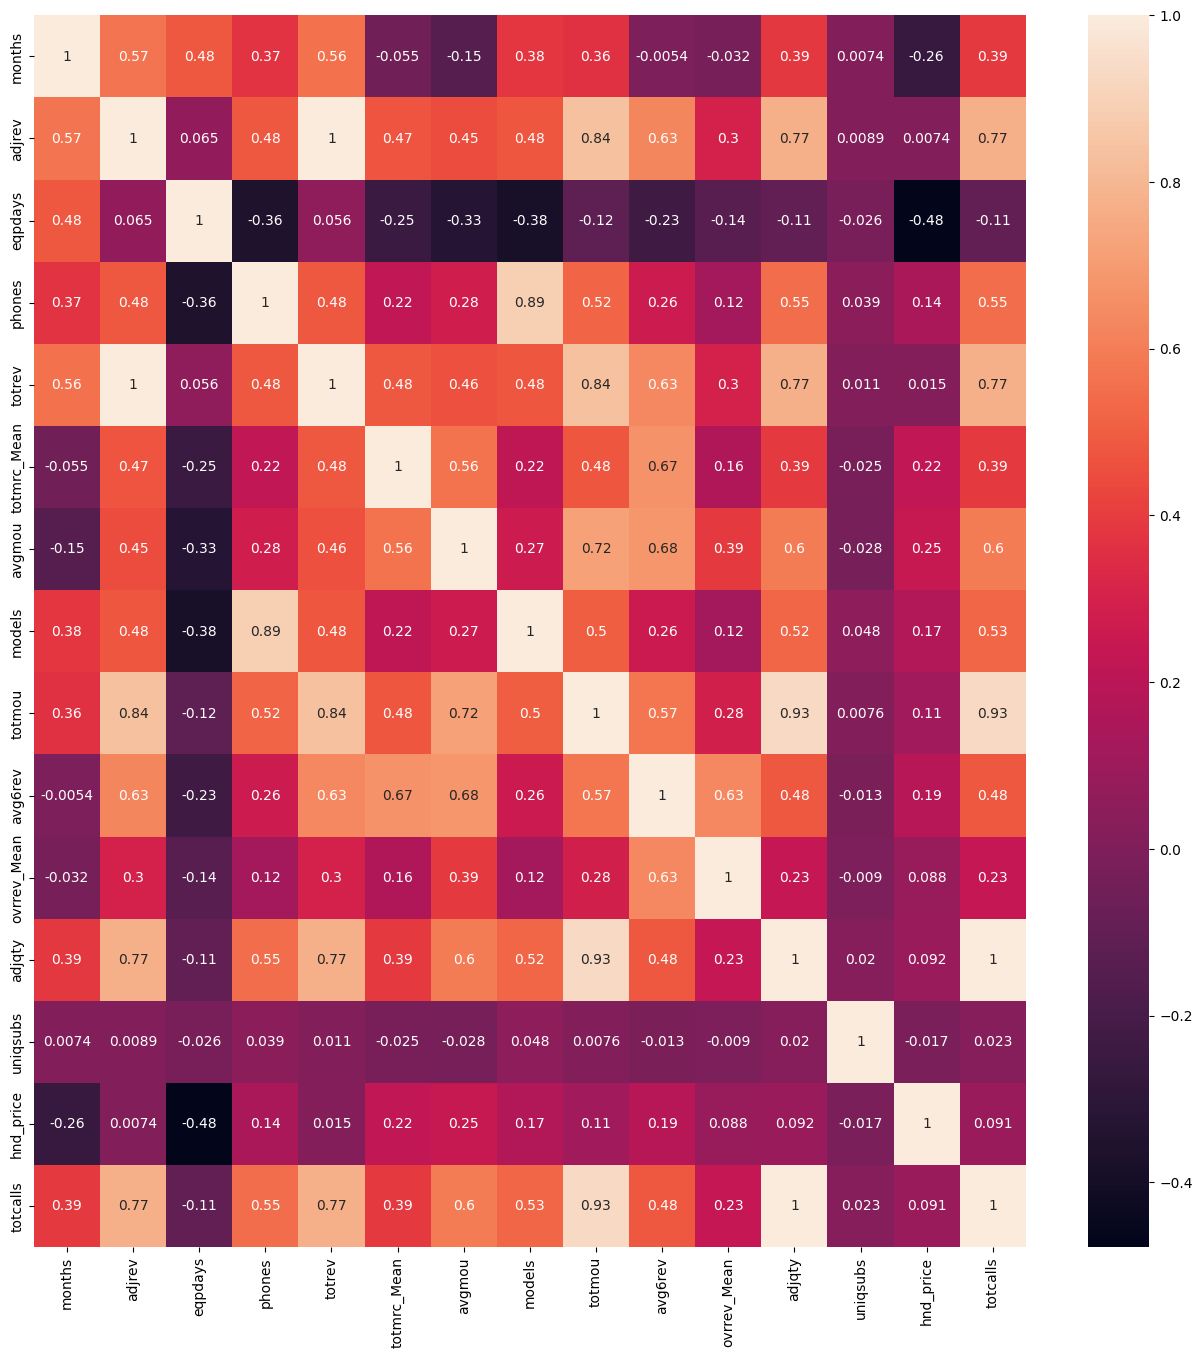

In [8]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[['months', 'adjrev', 'eqpdays', 'phones', 'totrev', 'totmrc_Mean', 'avgmou',  'models',  'totmou',  'avg6rev', 'ovrrev_Mean', 'adjqty', 'uniqsubs', 'hnd_price', 'totcalls']].corr(), annot=True)
plt.show()

The figure below shows the correlation of the data, months has a high positive correlation with totrev(0.56) and adjrev(0.57).

In [9]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [10]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no months
    2. Create X as all the columns that are not the months column
    3. Create y as the months column
    4. Drop the months, Respondent, and the Expected months columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing months values
    df = df.dropna(subset=['months'], axis=0)
    y = df['months']

    #Drop respondent and expected months columns
    df = df.drop(['months', 'Customer_ID'], axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [11]:
X, y = clean_data(df)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model = lgb.LGBMRegressor(random_state=123).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14818
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 193
[LightGBM] [Info] Start training from score 18.823829


We can then use our fitted model to predict the months for each
indvidual in our test set, and see how well these predictions match the truth.
                                        

In [15]:
y_test_preds = model.predict(X_test)

Confirm Predict metrics

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.9498105670046368
4.699132085671611


What contribute to prediction ?

In [17]:
importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
avgrev,472
adjrev,379
eqpdays,305
phones,179
totrev,138
area_LOS ANGELES AREA,90
models,87
totmrc_Mean,86
avgmou,79
avg6rev,61


In [18]:
!pip install shap

In [19]:
import shap

In [20]:
df_x_train = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [21]:
shap_values = explainer(df_x_train)

Permutation explainer: 100001it [2:07:48, 13.02it/s]                             


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


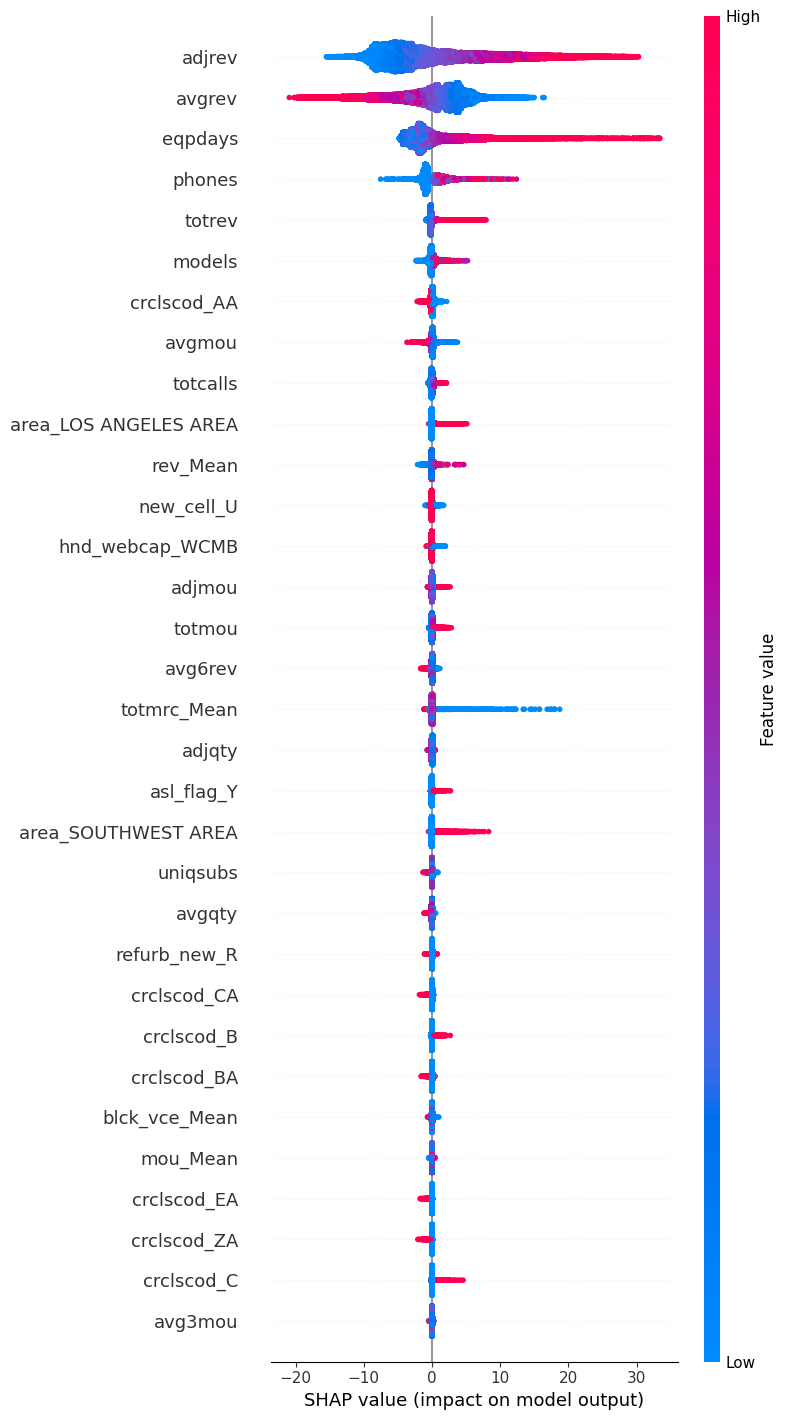

In [22]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


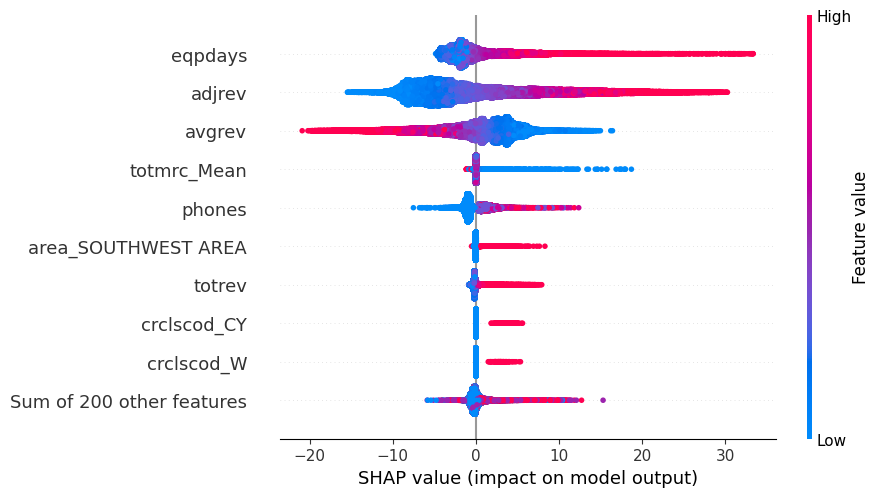

In [23]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

Clearly analyze the above results by omitting data that has no impact on the results.

In [24]:
drop_features = [
    'months',
    'Customer_ID',
    'rev_Mean',
    'mou_Mean',
    'da_Mean',
    'ovrmou_Mean',
    'vceovr_Mean',
    'datovr_Mean',
    'roam_Mean',
    'change_mou',
    'change_rev',
    'drop_vce_Mean',
    'drop_dat_Mean',
    'blck_vce_Mean',
    'blck_dat_Mean',
    'unan_vce_Mean',
    'unan_dat_Mean',
    'plcd_vce_Mean',
    'plcd_dat_Mean',
    'recv_vce_Mean',
    'recv_sms_Mean',
    'comp_vce_Mean',
    'comp_dat_Mean',
    'custcare_Mean',
    'ccrndmou_Mean',
    'cc_mou_Mean',
    'inonemin_Mean',
    'threeway_Mean',
    'mou_cvce_Mean',
    'mou_cdat_Mean',
    'mou_rvce_Mean',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'iwylis_vce_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_peav_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'churn',
    'actvsubs',
    'new_cell',
    'totcalls',
    'adjmou',
    'avgqty',
    'avg3mou',
    'avg3qty',
    'avg3rev',
    'avg6mou',
    'avg6qty',
    'prizm_social_one',
    'dualband',
    'hnd_price',
    'hnd_webcap',
    'truck',
    'rv',
    'ownrent',
    'lor',
    'dwlltype',
    'marital',
    'adults',
    'infobase',
    'income',
    'numbcars',
    'HHstatin',
    'dwllsize',
    'forgntvl',
    'ethnic',
    'kid0_2',
    'kid3_5',
    'kid6_10',
    'kid11_15',
    'kid16_17',
    'creditcd'
]

In [25]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969
missing value count per column:input_train_file
rev_Mean              357
mou_Mean              357
totmrc_Mean           357
da_Mean               357
ovrmou_Mean           357
ovrrev_Mean           357
vceovr_Mean           357
datovr_Mean           357
roam_Mean             357
change_mou            891
change_rev            891
drop_vce_Mean           0
drop_dat_Mean           0
blck_vce_Mean           0
blck_dat_Mean           0
unan_vce_Mean           0
unan_dat_Mean           0
plcd_vce_Mean           0
plcd_dat_Mean           0
recv_vce_Mean           0
recv_sms_Mean           0
comp_vce_Mean           0
comp_dat_Mean           0
custcare_Mean           0
ccrndmou_Mean           0
cc_mou_Mean             0
inonemin_Mean           0
threeway_Mean           0
mou_cvce_Mean           0
mou_cdat_Mean           0
mou_rvce_Mean           0
owylis_vce_Mean         0
mouowylisv_Mean         0
iwylis_vce_Mean         0
mouiwylisv_Mean     

In [26]:
def tract_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no months
    2. Create X as all the columns that are not the months column
    3. Create y as the months column
    4. Drop the months, Respondent, and the Expected months columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing months values
    df = df.dropna(subset=['months'], axis=0)
    y = df['months']

    #Drop respondent and expected months columns
    df = df.drop(drop_features, axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [27]:
X, y = tract_data(df)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
model = lgb.LGBMRegressor(random_state=123).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2712
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 70
[LightGBM] [Info] Start training from score 18.836457


In [30]:
y_test_preds = model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

This predict metrics result of score does not change with the above results.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.9502805086066552
4.629931884346029


In [32]:
importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
avgrev,536
adjrev,436
eqpdays,389
totrev,211
phones,188
totmrc_Mean,157
avgmou,151
models,117
totmou,93
area_LOS ANGELES AREA,87


In [33]:
df_X = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [34]:
shap_values = explainer(df_X)

Permutation explainer: 100001it [1:08:19, 24.34it/s]                           


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


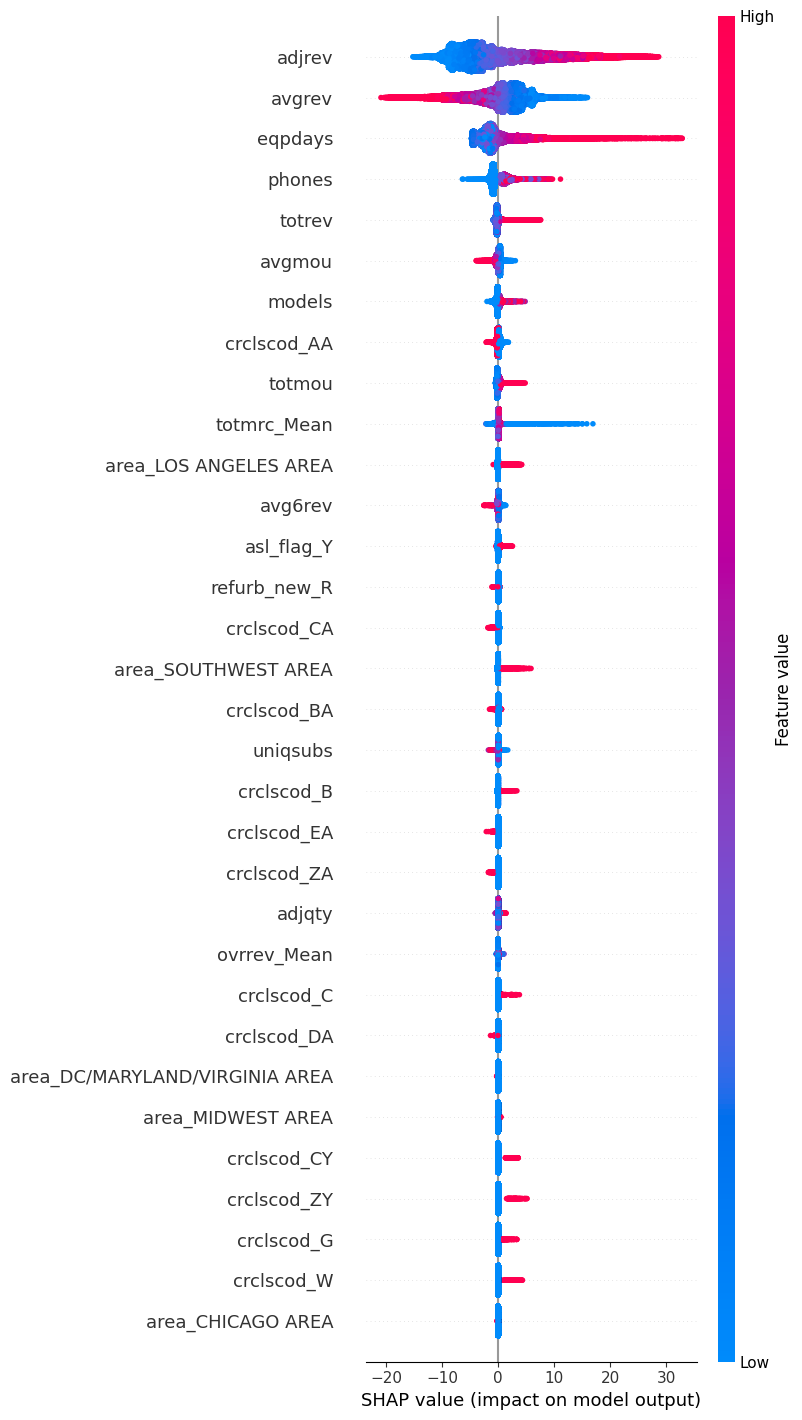

In [35]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

Furthermore, we created an AI to predict months in the figure below and found that adjrev, eqpdays, and phones have large positive correlations. Also, months is negatively correlated with avgrev, totmrc_Mean.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


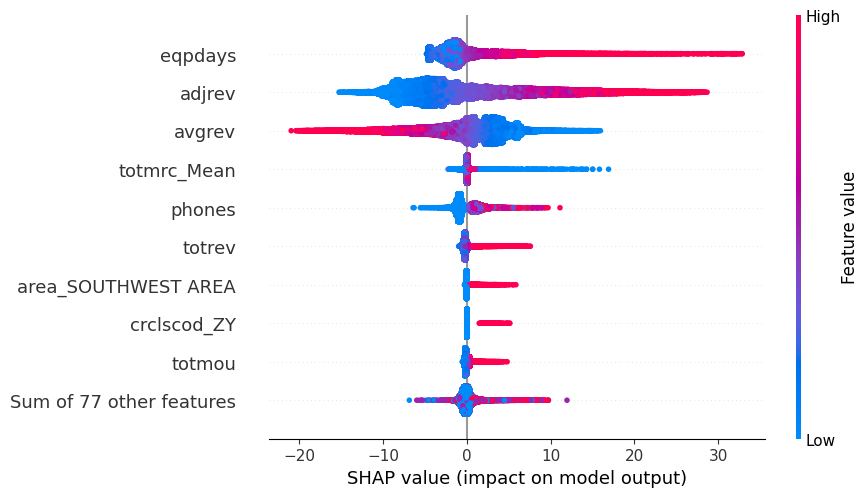

In [36]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

Among customers with high revenues, those who have used a large number of handset models and have been using them for a long time tend to have long contract terms.  

The customers with the highest revenues tend to have a larger number of handsets and longer contract terms.